[Scikit-Learn Course - Machine Learning in Python Tutorial](https://www.youtube.com/watch?v=pqNCD_5r0IU)

Modules not covered:
1. sklearn.ensemble
2. sklearn.feature_selection
3. sklearn.naive_bayes

Comments:
1. Use Pandas to make the results look like a nice readable table
2. In the linear regression, add also the p-values
3. In KNN and SVM show how to use the model for future data, not only the test part (i.e, how to implement it in SQL and/or BI program that is being refreshed daily). 

In [1]:
%pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 8.6 MB 3.4 MB/s            
     |████████████████████████████████| 306 kB 29.5 MB/s            
     |████████████████████████████████| 55.6 MB 14.3 MB/s            
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECA

In [3]:
%%python3 -m pip show scikit-learn

UsageError: %%python3 is a cell magic, but the cell body is empty.


In [4]:
%pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Matplotlib



In [5]:
import matplotlib.pyplot as plt

In [11]:
x = [i for i in range(10)]
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
y = [2*i for i in range(10)]
y

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Text(0, 0.5, 'y-axis')

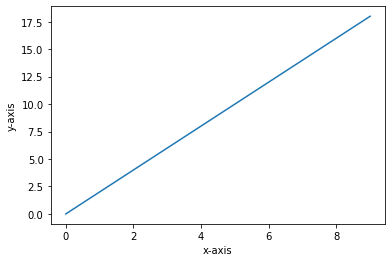

In [13]:
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

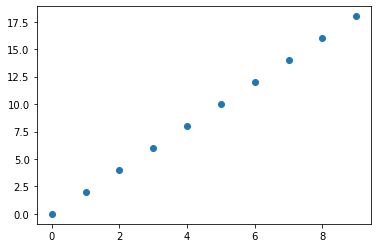

In [14]:
plt.scatter(x,y)

## Features and Labels

Features: attributes, independent variables, input

Label: dependent, variables, output

## Save and Open a Model

from sklean.externals import joblib

### Saving
filename = 'model.sav' \
joblib.dump(clf, filename)

### Open

clf = joblib.load(filename)

# K-Nearest Neighbors (KNN)

In [15]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
data = pd.read_csv('Scikit-learn/car.data')
print(data.head)
print(data.shape)

<bound method NDFrame.head of       vhigh vhigh.1      2   2.1  small   low  unacc
0     vhigh   vhigh      2     2  small   med  unacc
1     vhigh   vhigh      2     2  small  high  unacc
2     vhigh   vhigh      2     2    med   low  unacc
3     vhigh   vhigh      2     2    med   med  unacc
4     vhigh   vhigh      2     2    med  high  unacc
...     ...     ...    ...   ...    ...   ...    ...
1722    low     low  5more  more    med   med   good
1723    low     low  5more  more    med  high  vgood
1724    low     low  5more  more    big   low  unacc
1725    low     low  5more  more    big   med   good
1726    low     low  5more  more    big  high  vgood

[1727 rows x 7 columns]>
(1727, 7)


In [20]:
data.columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car_evaluation']

In [21]:
data

buying  maint  doors persons lug_boot safety car_evaluation
0     vhigh  vhigh      2       2    small    med          unacc
1     vhigh  vhigh      2       2    small   high          unacc
2     vhigh  vhigh      2       2      med    low          unacc
3     vhigh  vhigh      2       2      med    med          unacc
4     vhigh  vhigh      2       2      med   high          unacc
...     ...    ...    ...     ...      ...    ...            ...
1722    low    low  5more    more      med    med           good
1723    low    low  5more    more      med   high          vgood
1724    low    low  5more    more      big    low          unacc
1725    low    low  5more    more      big    med           good
1726    low    low  5more    more      big   high          vgood

[1727 rows x 7 columns]

## KNN: Subset Data

In [27]:
X = data[['buying', 'maint', 'safety']].values
y = data[['car_evaluation']]

In [23]:
print(X)
print(y)

     buying  maint safety
0     vhigh  vhigh    med
1     vhigh  vhigh   high
2     vhigh  vhigh    low
3     vhigh  vhigh    med
4     vhigh  vhigh   high
...     ...    ...    ...
1722    low    low    med
1723    low    low   high
1724    low    low    low
1725    low    low    med
1726    low    low   high

[1727 rows x 3 columns]
     car_evaluation
0             unacc
1             unacc
2             unacc
3             unacc
4             unacc
...             ...
1722           good
1723          vgood
1724          unacc
1725           good
1726          vgood

[1727 rows x 1 columns]


## KNN: Convert categories to dummy variables (X)

In [28]:
Le = LabelEncoder()
for i in range(len(X[0])):
    X[:,i] = Le.fit_transform(X[:,i])
print(X)

[[3 3 2]
 [3 3 0]
 [3 3 1]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]


## KNN: Convert categories to dummy variables (y)

In [30]:
label_mapping = {
    'unacc': 0, 
    'acc': 1, 
    'good': 2, 
    'vgood': 3 
}

y['car_evaluation'] = y['car_evaluation'].map(label_mapping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


/var/folders/kw/srzmwfqn4sbcw3361mxwtgg80000gn/T/ipykernel_88606/3039402383.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['car_evaluation'] = y['car_evaluation'].map(label_mapping)


## Create Model

In [31]:
knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights = 'uniform')


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

knn.fit(X_train,y_train)

prediction = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction)
print("predictions:", prediction)
print("accuracy:", accuracy)

predictions: [1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 2 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 2 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 2 0
 0 1 2 2 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 2 0 1 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 2 1 0 0 0 2 0 1 0 2 1 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 2 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 1 2 1 1 2 1 0 1 0 2 1 1 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0]
accuracy: 0.7283236994219653


/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Test actual Model

In [32]:
print("actual value: ", y[20])
print("predicted value: ", knn.predict(X)[20])

actual value:  [0]
predicted value:  0


## Testing for Best Accuracy


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

accuracies = []

for i in range(15, 100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights = 'uniform')
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction)
    #print("predictions:", prediction)
    accuracies.append(accuracy)
    print(f"{i} accuracy: {accuracy}")

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

15 accuracy: 0.7225433526011561
16 accuracy: 0.7167630057803468
17 accuracy: 0.7138728323699421
18 accuracy: 0.7196531791907514
19 accuracy: 0.7196531791907514
20 accuracy: 0.708092485549133
21 accuracy: 0.708092485549133
22 accuracy: 0.7109826589595376
23 accuracy: 0.7138728323699421
24 accuracy: 0.7138728323699421
25 accuracy: 0.7341040462427746
26 accuracy: 0.7341040462427746
27 accuracy: 0.7312138728323699
28 accuracy: 0.7312138728323699
29 accuracy: 0.7369942196531792
30 accuracy: 0.7138728323699421
31 accuracy: 0.7138728323699421
32 accuracy: 0.7225433526011561
33 accuracy: 0.7225433526011561
34 accuracy: 0.7254335260115607
35 accuracy: 0.7254335260115607
36 accuracy: 0.708092485549133
37 accuracy: 0.7109826589595376
38 accuracy: 0.6965317919075145
39 accuracy: 0.6791907514450867


/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

40 accuracy: 0.6965317919075145
41 accuracy: 0.6994219653179191
42 accuracy: 0.6994219653179191
43 accuracy: 0.6965317919075145
44 accuracy: 0.6878612716763006
45 accuracy: 0.6878612716763006
46 accuracy: 0.6878612716763006
47 accuracy: 0.6878612716763006
48 accuracy: 0.6820809248554913
49 accuracy: 0.6907514450867052
50 accuracy: 0.684971098265896
51 accuracy: 0.7052023121387283
52 accuracy: 0.684971098265896
53 accuracy: 0.6791907514450867
54 accuracy: 0.684971098265896
55 accuracy: 0.6791907514450867
56 accuracy: 0.6791907514450867
57 accuracy: 0.6791907514450867
58 accuracy: 0.6791907514450867
59 accuracy: 0.6791907514450867
60 accuracy: 0.6791907514450867
61 accuracy: 0.6791907514450867
62 accuracy: 0.6791907514450867
63 accuracy: 0.6994219653179191
64 accuracy: 0.684971098265896


/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

65 accuracy: 0.7023121387283237
66 accuracy: 0.6820809248554913
67 accuracy: 0.7052023121387283
68 accuracy: 0.6820809248554913
69 accuracy: 0.6820809248554913
70 accuracy: 0.6820809248554913
71 accuracy: 0.6820809248554913
72 accuracy: 0.6820809248554913
73 accuracy: 0.6820809248554913
74 accuracy: 0.6820809248554913
75 accuracy: 0.6820809248554913
76 accuracy: 0.6820809248554913
77 accuracy: 0.6820809248554913
78 accuracy: 0.6820809248554913
79 accuracy: 0.6994219653179191
80 accuracy: 0.6994219653179191
81 accuracy: 0.6994219653179191
82 accuracy: 0.6936416184971098
83 accuracy: 0.6936416184971098
84 accuracy: 0.6936416184971098
85 accuracy: 0.6936416184971098
86 accuracy: 0.6936416184971098
87 accuracy: 0.6936416184971098
88 accuracy: 0.6936416184971098
89 accuracy: 0.6936416184971098
90 accuracy: 0.6936416184971098
91 accuracy: 0.6936416184971098
92 accuracy: 0.6936416184971098
93 accuracy: 0.6936416184971098
94 accuracy: 0.6936416184971098
95 accuracy: 0.6936416184971098
96 accur

/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

## Multi Dimensional Plotting

In [35]:
%pip install plotly

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 15.2 MB 2.8 MB/s            
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
data_dim

In [ ]:
import plotly
import plotly.graph_objs as go

#Make Plotly figure
fig1 = go.Scatter(x=data['curb-weight'],
                  y=data['price'],
                  mode='markers')

#Make Plot.ly Layout
mylayout = go.Layout(xaxis=dict(title="curb-weight"),
                     yaxis=dict( title="price"))

#Plot and save html
plotly.offline.plot({"data": [fig1],
                     "layout": mylayout},
                     auto_open=True)

## Support Vector Machine

- Effective high dimensional spaces
- Many Kernel functions
- Classification and regression

Creates a hyper plane in 2d (x,y) its a line, in 3d (x, y, z) it's a plane

SVM computes the distance from the decision boundary to the hyper plane looking for the maximum margin between the decision boundaries | | |

Changing the kernel from linear to polynomial to RBF (exponential), kernel is a function to increase the dimension or the ability of the line describe the observations

In [48]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

# split it in features and labels

X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']

print(f'Iris data: {X.shape}')
print(f'Iris target: {y.shape}')

Iris data: (150, 4)
Iris target: (150,)


## Data Dictionary

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

## Split into Train test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#Test size is percentage split into the test portion

print(f'X_train Shape: {X_train.shape}')
print(f'X_train Shape: {X_test.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (120, 4)
X_train Shape: (30, 4)
y_train Shape: (120,)
y_test Shape: (30,)


In [47]:
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

SVC()


In [54]:
predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print(f'Predictions: {predictions}')
print(f'Actual:      {y_test}')

print(f'Accuracy: {acc}')

Predictions: [0 2 0 1 1 0 0 0 2 2 2 1 0 1 0 0 2 2 2 2 1 1 0 0 1 1 0 0 2 1]
Actual:      [0 2 0 1 1 0 0 0 2 2 2 1 0 1 0 0 2 2 2 2 1 1 0 0 1 2 0 0 2 1]
Accuracy: 0.9666666666666667


In [57]:
for i in range(len(predictions)):
    print(classes[predictions[i]])

Iris Setosa
Iris Virginica
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Setosa
Iris Virginica
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Virginica
Iris Virginica
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Virginica
Iris Versicolour


## Linear Regressions

Dataset: The Boston Housing Dataset \
Link: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- Number of Cases
    - The dataset contains a total of 506 cases.
- Variables: There are 14 attributes in each case of the dataset. They are:

    - **CRIM** - per capita crime rate by town
    - **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
    - **INDUS** - proportion of non-retail business acres per town.
    - **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - **NOX** - nitric oxides concentration (parts per 10 million)
    - **RM** - average number of rooms per dwelling
    - **AGE** - proportion of owner-occupied units built prior to 1940
    - **DIS** - weighted distances to five Boston employment centres
    - **RAD** - index of accessibility to radial highways
    - **TAX** - full-value property-tax rate per \$10,000
    - **PTRATIO** - pupil-teacher ratio by town
    - **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - **LSTAT** - \% lower status of the population
    - **MEDV** - Median value of owner-occupied homes in $1000's

In [58]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

boston = datasets.load_boston()

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


## Features / Label

In [63]:
X = boston.data
y = boston.target

print(f'X: {X}')
print(f"y: {y}")
print(f'X Shape: {X.shape}')

print(f'Y Shape: {y.shape}')


X: [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
y: [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19

## Algorithm

/var/folders/kw/srzmwfqn4sbcw3361mxwtgg80000gn/T/ipykernel_88606/1752802976.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
/var/folders/kw/srzmwfqn4sbcw3361mxwtgg80000gn/T/ipykernel_88606/1752802976.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()
/var/folders/kw/srzmwfqn4sbcw3361mxwtgg80000gn/T/ipykernel_88606/1752802976.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  h.show()


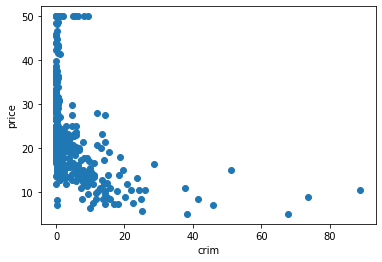

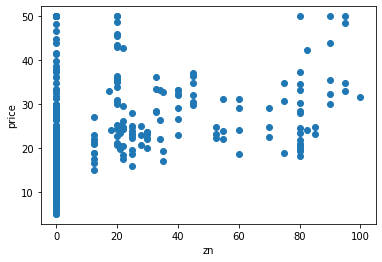

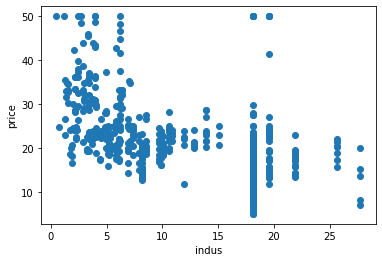

In [74]:
l_reg = linear_model.LinearRegression()
f = plt.figure(1)
plt.scatter(X.T[0],y)
plt.xlabel('crim')
plt.ylabel('price')
f.show()
g = plt.figure(2)
plt.scatter(X.T[1],y)
plt.xlabel('zn')
plt.ylabel('price')

g.show()
h = plt.figure(3)
plt.scatter(X.T[2],y)
plt.xlabel('indus')
plt.ylabel('price')

h.show()

## Train Test Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


## Train

In [79]:
model = l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Predictions: {predictions}")
print(f'R^2:         {l_reg.score(X,y)}')
print(f'intercept:   {l_reg.intercept_}')
print(f'coeff {l_reg.coef_}')


Predictions: [ 7.797681   27.23442861 19.79946193 36.55201373  9.15733408 33.2070963
 16.45901587 22.5744628  14.6264436  17.50414559 25.96990841 22.0535605
 19.16410143  7.48807279 19.95641109 17.53734677 12.77641262 41.35453843
 32.10244575 24.1634038  20.82407868 24.94493917 24.39387498 13.93920418
 25.90185724 26.85027844 22.61986266  1.31747568 27.94579574 24.22397035
 24.35765105 17.05702815 17.94988339 21.10784255 22.06179705 17.09384999
 24.69550044 15.36961229 33.56313403 16.70801555 20.08736928 20.44608521
 25.63984286 39.5566706  11.5182435  25.49772166  2.19481932 17.81013413
 16.33092534 36.44246743 25.58377551 21.5631111   5.18451835 27.88782758
 29.47990039 30.96302473 25.08187238 23.83242492 24.17115987 24.33220108
 30.6406831  17.11632963 19.96818951 24.20791942 22.29822785 13.20358921
 20.60979821 36.4287769  18.53491854 37.24757724 36.54348312 19.71102166
  2.51844551 28.77507179 23.94879608 19.76013029 29.04025016 21.04735407
 19.0971738  27.69159791 27.35876611 18.

## K Means 


In [80]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

In [82]:
bc = load_breast_cancer()
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [86]:
X = scale(bc.data) #Standardize a dataset along any axis.
print(f'X: {X}')
y = bc.target
print(f'y: {y}')


X: [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [88]:
model = KMeans(n_clusters = 2, random_state = 0)
model.fit(X_train)
predictions = model.predict(X_test)


In [89]:
labels = model.labels_

In [90]:
print(f'Labels: {labels}')
print(f'predictions: {predictions}')
print(f'accuracy: {accuracy_score(y_test, predictions)}')
print(f'actual: {y_test}')

Labels: [0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 1 1 0 0 1 0 1 0 0]
predictions: [0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 

In [91]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0       32  135
1      282    6


In [92]:
def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean')))

In [93]:
bench_k_means(model,'1',X)

1        	11595	0.525	0.540	0.532	0.654	0.532	0.343


In [95]:
!pip3 install pillow mnist numpy sklearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=6dfe052b168741274d14cfe75a0fbe07a0a2bcd387fb560edffed784f4afedee
  Stored in directory: /Users/e/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you a

* Pillow - Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats. 
* MNIST - Simple MNIST and EMNIST data parser written in pure Python. MNIST is a database of handwritten digits available on http://yann.lecun.com/exdb/mnist/. EMNIST is an extended MNIST database https://www.nist.gov/itl/iad/image-group/emnist-dataset.



In [99]:
from PIL import Image
import mnist
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [101]:
# Training
x_train = mnist.train_images()
y_train = mnist.train_labels()

In [102]:
# Test
x_test = mnist.test_images()
y_test = mnist.test_labels()

In [103]:
print(f'x_train: {x_train}')
print(f'x_test: {x_test}')
print(f'y_train {y_train}')

x_train: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
x_test: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 

In [104]:
print(x_train.ndim)

3


In [107]:
print(x_train.shape)
#60000 samples instances, 28 by 28 pixels

(60000, 784)


In [109]:
print(x_test.shape)


(10000, 784)


In [108]:
x_train = x_train.reshape((-1, 28*28))
#new dimension: should be 60000, but the -1 automatically detects the number, 
x_test = x_test.reshape(-1,28*28)

In [110]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [111]:
# Getting the data to 0 and 1s

x_train = (x_train/256)
x_test = (x_test/256)

In [112]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [113]:
clf = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes =(64,64))
#tweak the hidden layers

In [114]:
clf.fit(x_train, y_train)
# Start 3:24; 15:24
# End 3:25; 15:25

MLPClassifier(hidden_layer_sizes=(64, 64))

In [115]:
prediction = clf.predict(x_test)

In [116]:
acc = confusion_matrix(y_test, prediction)

In [117]:
print(acc)

[[ 968    0    0    2    2    0    2    2    3    1]
 [   0 1124    5    2    0    1    1    1    1    0]
 [   6    2 1008    6    1    0    1    4    4    0]
 [   0    0    3  988    0    3    0    4    6    6]
 [   1    0    3    0  961    0    4    3    1    9]
 [   4    0    1   10    1  865    5    1    3    2]
 [   6    2    2    1    4    7  934    0    2    0]
 [   1    2    9    2    2    0    0 1000    5    7]
 [   4    0    4    5    2    8    3    1  943    4]
 [   2    2    0    8    6    4    0    2    2  983]]


In [120]:
#How well the matrix performed: The diagonal sum / by sum of all elements;
def accuracy(cm):
    diagonal = cm.trace()
    elements = cm.sum()
    return diagonal/elements

    

In [121]:
print(accuracy(acc))

0.9774


image2bytes.py

from PIL import Image
img = Image.open('five1.png')

data = list(img.getdata())

print(data)
for i in range(len(data)):
    data[i] = 255-data[i]
print(data)



In [ ]:
#five = [array of image data white and black five]
#five = np.array(five)/256

#p = clf.predict([five])
#print(p)

In [125]:
img = Image.open('bwfive.png')
data = list(img.getdata())
print(data)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 

In [127]:
five = [data]
five = np.array(five)/256
print(five)
p = clf.predict([five])
print(p)

[[0.0078125 0.0078125 0.0078125 ... 0.        0.        0.       ]]


ValueError: Found array with dim 3. MLPClassifier expected <= 2.

In [ ]:
img = Image.open('2022_06_20_0qe_Kleki.png')
data = list(img.getdata())
#print(data)
res = []
for i in range(len(data)):
    print(data[i])
    for j in data[i]:
        print(j)
#        data[i] = 255-data[i]
        res.append(255-j)

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(254, 254, 254, 255)
254
254
254
255
(254, 254, 254, 255)
254
254
254
255
(253, 253, 253, 255)
253
253
253
255
(252, 252, 252, 255)
252
252
252
255
(252, 252, 252, 255)
252
252
252
255
(253, 253, 253, 255)
253
253
253
255
(254, 254, 254, 255)
254
254
254
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(252, 252, 252, 255)
252
252
252
255
(255, 255, 255, 255)
255
255
255
255
(186, 186, 186, 255)
186
186
186
255
(0, 0, 0, 255)
0
0
0
255
(39, 39, 39, 255)
39
39
39
255
(0, 0, 0, 255)
0
0


255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

33
33
255
(33, 33, 33, 255)
33
33
33
255
(28, 28, 28, 255)
28
28
28
255
(8, 8, 8, 255)
8
8
8
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(3, 3, 3, 255)
3
3
3
255
(17, 17, 17, 255)
17
17
17
255
(0, 0, 0, 255)
0
0
0
255
(233, 233, 233, 255)
233
233
233
255
(255, 255, 255, 255)
255
255
255
255
(253, 253, 253, 255)
253
253
253
255
(255, 255, 

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

23
23
255
(24, 24, 24, 255)
24
24
24
255
(23, 23, 23, 255)
23
23
23
255
(27, 27, 27, 255)
27
27
27
255
(21, 21, 21, 255)
21
21
21
255
(57, 57, 57, 255)
57
57
57
255
(157, 157, 157, 255)
157
157
157
255
(242, 242, 242, 255)
242
242
242
255
(255, 255, 255, 255)
255
255
255
255
(253, 253, 253, 255)
253
253
253
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)


255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(129, 129, 129, 255)
129
129
129
255
(

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(252, 252, 252, 255)
252
252
252
255
(255, 255, 255, 255)
255
255
255
255
(227, 227, 227, 255)
227
227
227
255
(0, 0, 0, 255)
0
0
0
255
(7, 7

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(253, 253, 253, 255)
253
253
253
255
(255, 255, 255, 255)
255
255
255
255
(174, 174, 174, 255)
174
174
174
255
(0, 0, 0, 255)
0
0
0
255
(

255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(1, 1, 1, 255)
1
1
1
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(29, 29, 29, 255)
29
29
29
255
(35, 35, 35, 255)
35
35
35
255
(0, 0, 0, 255)
0
0
0
255
(123, 123, 123, 255)
123
123
123
255
(243, 243, 243, 255)
243
243
243
255
(255, 255, 255, 255)
255
255
255
255
(252, 252, 252, 255)
252
252
252
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255

255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
2

255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
2

255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(1, 1, 1, 255)
1
1
1
255
(1, 1, 1, 255)
1
1
1
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(7, 7, 7, 255)
7
7
7
255
(29, 29, 29, 255)
29
29
29
255
(43, 43, 43, 255)
43
43
43
255
(34, 34, 34, 255)
34
34
34
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(0, 0, 0, 255)
0
0
0
255
(14, 14, 14, 255)
14
14
14
255
(104, 104, 104, 255)
104
104
104
255
(152, 152, 152, 255)
152
152
152
255
(202, 202, 202, 255)
202
202
202
255
(234, 234, 234, 255)
234
234
234
255
(252, 252, 252, 255)
252
252
252
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(254, 254, 254, 255)
254
254
254
255
(253, 253, 253, 255)
253
253


255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
2

(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(255, 255, 255, 255)
255
255
255
255
(

In [ ]:
five = [res]
five = np.array(five)/256
print(five)
p = clf.predict([five])
print(p)

In [ ]:
res